## 使用 tf.keras.datasets 加载数据

In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.9.1'

In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [5]:
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

# Reserve 10,000 samples for validation
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

In [6]:
print(x_train.shape)
print(x_val.shape)

(50000, 28, 28)
(10000, 28, 28)


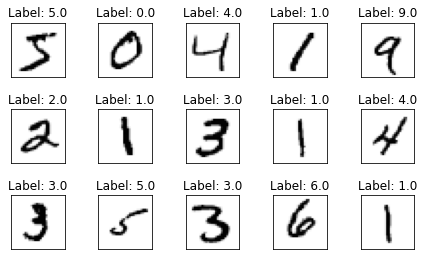

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(15):
    plt.subplot(3,5,i+1) # 绘制前15个手写体数字，以3行5列子图形式展示
    plt.tight_layout() # 自动适配子图尺寸
    plt.imshow(x_train[i], cmap='Greys') # 使用灰色显示像素灰度值
    plt.title("Label: {}".format(y_train[i])) # 设置标签为子图标题
    plt.xticks([]) # 删除x轴标记
    plt.yticks([]) # 删除y轴标记

## 使用 tf.keras 管理 Sequential 模型

In [8]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [10]:
!pip install graphviz pydot
# !apt-get install -y graphviz
# !brew install graphviz
# !winget install graphviz

You should consider upgrading via the 'I:\python\tensorflow-learn\env\Scripts\python.exe -m pip install --upgrade pip' command.


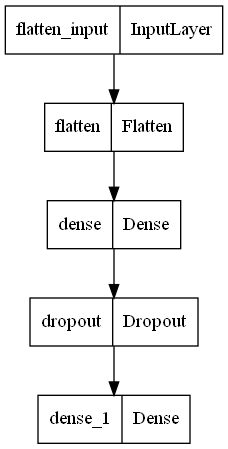

In [11]:
tf.keras.utils.plot_model(model, 'mnist_model.png')

In [12]:
model.compile(optimizer="adam",
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 3s 1ms/step - loss: 2.9319 - accuracy: 0.7544
Epoch 2/5
1563/1563 [==============================] - 2s 1ms/step - loss: 0.6223 - accuracy: 0.8424
Epoch 3/5
1563/1563 [==============================] - 2s 1ms/step - loss: 0.5169 - accuracy: 0.8668
Epoch 4/5
1563/1563 [==============================] - 2s 1ms/step - loss: 0.4384 - accuracy: 0.8857
Epoch 5/5
1563/1563 [==============================] - 2s 1ms/step - loss: 0.4132 - accuracy: 0.8958


In [14]:
model.evaluate(x_val, y_val)

313/313 [==============================] - 0s 1ms/step - loss: 0.3012 - accuracy: 0.9341


[0.3011924624443054, 0.9340999722480774]

### 保存为 SavedModel 格式模型

In [15]:
model.save("./saved_model/mnist_model")

INFO:tensorflow:Assets written to: ./saved_model/mnist_model\assets


### 加载 SavedModel 格式模型

In [16]:
sm = tf.keras.models.load_model("./saved_model/mnist_model")

In [17]:
sm.evaluate(x_val, y_val)

313/313 [==============================] - 0s 1ms/step - loss: 0.3012 - accuracy: 0.9341


[0.3011924624443054, 0.9340999722480774]

### 保存为 HDF5 格式模型

In [18]:
model.save("./saved_model/mnist_model.h5")

### 加载 HDF5 格式模型

In [19]:
hm = tf.keras.models.load_model("./saved_model/mnist_model.h5")

In [20]:
hm.evaluate(x_val, y_val)

313/313 [==============================] - 0s 1ms/step - loss: 0.3012 - accuracy: 0.9341


[0.3011924624443054, 0.9340999722480774]

## 使用 tf.keras 管理 functional API

In [21]:
# For easy reset of notebook state.
tf.keras.backend.clear_session() 

#### 使用 tf.keras.Input 定义模型输入

In [22]:
inputs = tf.keras.Input(shape=(28, 28))
x = tf.keras.layers.Flatten(input_shape=(28, 28))(inputs)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(10, activation='relu')(x)

In [23]:
model = tf.keras.Model(inputs=inputs, outputs=outputs, name='mnist_model')

In [24]:
model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [25]:
# !pip install graphviz pydot
# !apt-get install -y graphviz

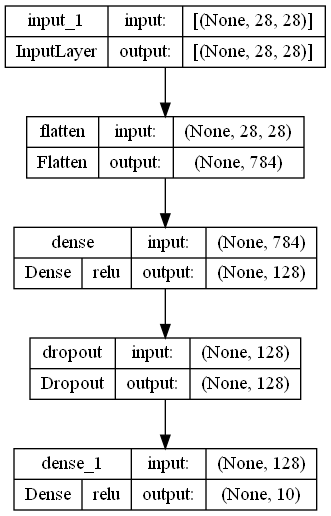

In [26]:
tf.keras.utils.plot_model(model, './saved_model/' + model.name + '.png', show_layer_activations=True, show_shapes=True, show_layer_names=True)

In [27]:
model.compile(optimizer="adam",
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 3s 2ms/step - loss: 13.1553 - accuracy: 0.1423
Epoch 2/5
1563/1563 [==============================] - 2s 1ms/step - loss: 2.5158 - accuracy: 0.1460
Epoch 3/5
1563/1563 [==============================] - 2s 1ms/step - loss: 2.2590 - accuracy: 0.1207
Epoch 4/5
1563/1563 [==============================] - 2s 1ms/step - loss: 2.2634 - accuracy: 0.1210
Epoch 5/5
1563/1563 [==============================] - 2s 1ms/step - loss: 2.3075 - accuracy: 0.1050


In [29]:
model.evaluate(x_val, y_val)

313/313 [==============================] - 0s 961us/step - loss: 2.3021 - accuracy: 0.0993


[2.3021304607391357, 0.09929999709129333]

### 模型保存和加载：functional API 与 Sequential 完全兼容